In [1]:
# Import library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib.pyplot as plt # plotting library
from IPython.display import display # Manage multiple output per cell
import datetime

In [2]:
# Import sickit methods

In [11]:
# Import model
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier

In [4]:
# Define target
target = 'INFO_FTR_H'

In [5]:
# Define all different features dataset
all_feature_L2 = ['A_MEANS_FIVE_AC','A_MEANS_FIVE_AF','A_MEANS_FIVE_AR','A_MEANS_FIVE_AS','A_MEANS_FIVE_AST','A_MEANS_FIVE_AY','A_MEANS_FIVE_FTAG','A_MEANS_FIVE_FTHG','A_MEANS_FIVE_FTR_A','A_MEANS_FIVE_FTR_D','A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC','A_MEANS_FIVE_HF','A_MEANS_FIVE_HR','A_MEANS_FIVE_HS','A_MEANS_FIVE_HST','A_MEANS_FIVE_HTAG','A_MEANS_FIVE_HTHG','A_MEANS_FIVE_HTR_A','A_MEANS_FIVE_HTR_D','A_MEANS_FIVE_HTR_H','A_MEANS_FIVE_HY','H_MEANS_FIVE_AC','H_MEANS_FIVE_AF','H_MEANS_FIVE_AR','H_MEANS_FIVE_AS','H_MEANS_FIVE_AST','H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_FTR_D','H_MEANS_FIVE_FTR_H','H_MEANS_FIVE_HC','H_MEANS_FIVE_HF','H_MEANS_FIVE_HR','H_MEANS_FIVE_HS','H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTHG','H_MEANS_FIVE_HTR_A','H_MEANS_FIVE_HTR_D','H_MEANS_FIVE_HTR_H','H_MEANS_FIVE_HY','A_MEANS_THREE_AC','A_MEANS_THREE_AF','A_MEANS_THREE_AR','A_MEANS_THREE_AS','A_MEANS_THREE_AST','A_MEANS_THREE_AY','A_MEANS_THREE_FTAG','A_MEANS_THREE_FTHG','A_MEANS_THREE_FTR_A','A_MEANS_THREE_FTR_D','A_MEANS_THREE_FTR_H','A_MEANS_THREE_HC','A_MEANS_THREE_HF','A_MEANS_THREE_HR','A_MEANS_THREE_HS','A_MEANS_THREE_HST','A_MEANS_THREE_HTAG','A_MEANS_THREE_HTHG','A_MEANS_THREE_HTR_A','A_MEANS_THREE_HTR_D','A_MEANS_THREE_HTR_H','A_MEANS_THREE_HY','H_MEANS_THREE_AC','H_MEANS_THREE_AF','H_MEANS_THREE_AR','H_MEANS_THREE_AS','H_MEANS_THREE_AST','H_MEANS_THREE_AY','H_MEANS_THREE_FTAG','H_MEANS_THREE_FTHG','H_MEANS_THREE_FTR_A','H_MEANS_THREE_FTR_D','H_MEANS_THREE_FTR_H','H_MEANS_THREE_HC','H_MEANS_THREE_HF','H_MEANS_THREE_HR','H_MEANS_THREE_HS','H_MEANS_THREE_HST','H_MEANS_THREE_HTAG','H_MEANS_THREE_HTHG','H_MEANS_THREE_HTR_A','H_MEANS_THREE_HTR_D','H_MEANS_THREE_HTR_H','H_MEANS_THREE_HY','A_STD_FIVE_AC','A_STD_FIVE_AF','A_STD_FIVE_AR','A_STD_FIVE_AS','A_STD_FIVE_AST','A_STD_FIVE_AY','A_STD_FIVE_FTAG','A_STD_FIVE_FTHG','A_STD_FIVE_FTR_A','A_STD_FIVE_FTR_D','A_STD_FIVE_FTR_H','A_STD_FIVE_HC','A_STD_FIVE_HF','A_STD_FIVE_HR','A_STD_FIVE_HS','A_STD_FIVE_HST','A_STD_FIVE_HTAG','A_STD_FIVE_HTHG','A_STD_FIVE_HTR_A','A_STD_FIVE_HTR_D','A_STD_FIVE_HTR_H','A_STD_FIVE_HY','H_STD_FIVE_AC','H_STD_FIVE_AF','H_STD_FIVE_AR','H_STD_FIVE_AS','H_STD_FIVE_AST','H_STD_FIVE_AY','H_STD_FIVE_FTAG','H_STD_FIVE_FTHG','H_STD_FIVE_FTR_A','H_STD_FIVE_FTR_D','H_STD_FIVE_FTR_H','H_STD_FIVE_HC','H_STD_FIVE_HF','H_STD_FIVE_HR','H_STD_FIVE_HS','H_STD_FIVE_HST','H_STD_FIVE_HTAG','H_STD_FIVE_HTHG','H_STD_FIVE_HTR_A','H_STD_FIVE_HTR_D','H_STD_FIVE_HTR_H','H_STD_FIVE_HY','A_STD_THREE_AC','A_STD_THREE_AF','A_STD_THREE_AR','A_STD_THREE_AS','A_STD_THREE_AST','A_STD_THREE_AY','A_STD_THREE_FTAG','A_STD_THREE_FTHG','A_STD_THREE_FTR_A','A_STD_THREE_FTR_D','A_STD_THREE_FTR_H','A_STD_THREE_HC','A_STD_THREE_HF','A_STD_THREE_HR','A_STD_THREE_HS','A_STD_THREE_HST','A_STD_THREE_HTAG','A_STD_THREE_HTHG','A_STD_THREE_HTR_A','A_STD_THREE_HTR_D','A_STD_THREE_HTR_H','A_STD_THREE_HY','H_STD_THREE_AC','H_STD_THREE_AF','H_STD_THREE_AR','H_STD_THREE_AS','H_STD_THREE_AST','H_STD_THREE_AY','H_STD_THREE_FTAG','H_STD_THREE_FTHG','H_STD_THREE_FTR_A','H_STD_THREE_FTR_D','H_STD_THREE_FTR_H','H_STD_THREE_HC','H_STD_THREE_HF','H_STD_THREE_HR','H_STD_THREE_HS','H_STD_THREE_HST','H_STD_THREE_HTAG','H_STD_THREE_HTHG','H_STD_THREE_HTR_A','H_STD_THREE_HTR_D','H_STD_THREE_HTR_H','H_STD_THREE_HY','INFO_Div_D1','INFO_Div_E0','INFO_Div_E1','INFO_Div_E2','INFO_Div_F1','INFO_Div_I1','INFO_Div_SC0','INFO_Div_SP1','DNN_adam_all','DNN_adam_bf','DNN_sgd_all','DNN_sgd_bf','XGBoost_all','XGBoost_bf','SVM','RF_all','RF_bf','NB','MLP','LDA','KNN','ExraTree','ElasticNEt','Bagging_max_sample','Bagging_min_sample_all','Bagging_min_sample_bf','AdaBoost','GB','LR']
best_features_L2_NB = ['A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HF', 'A_MEANS_FIVE_HS','A_MEANS_FIVE_HTR_D', 'H_MEANS_FIVE_AF', 'H_MEANS_FIVE_AY','H_MEANS_FIVE_HF', 'A_MEANS_THREE_AF', 'A_MEANS_THREE_HF','H_MEANS_THREE_AF', 'A_STD_FIVE_HF', 'H_STD_FIVE_AS','H_STD_FIVE_AST', 'H_STD_FIVE_FTHG', 'H_STD_FIVE_HTAG','H_STD_FIVE_HY', 'DNN_adam_all', 'DNN_adam_bf', 'DNN_sgd_all','DNN_sgd_bf', 'XGBoost_all', 'XGBoost_bf', 'SVM', 'RF_all','RF_bf', 'NB', 'MLP', 'LDA', 'KNN', 'ExraTree', 'ElasticNEt','Bagging_max_sample', 'Bagging_min_sample_all','Bagging_min_sample_bf', 'AdaBoost', 'GB']
best_features_L2_MLP = ['DNN_sgd_bf', 'RF_all', 'RF_bf', 'NB', 'MLP', 'LDA', 'KNN','Bagging_min_sample_bf']
best_feature_L2_ET = ['A_MEANS_FIVE_FTAG', 'A_MEANS_FIVE_HS', 'H_MEANS_FIVE_AF','H_MEANS_FIVE_HF', 'A_MEANS_THREE_AF', 'A_MEANS_THREE_HF','H_MEANS_THREE_AF', 'A_STD_FIVE_HF', 'H_STD_FIVE_AS','H_STD_FIVE_AST', 'H_STD_FIVE_HY', 'DNN_adam_all', 'DNN_adam_bf','DNN_sgd_bf', 'XGBoost_all', 'XGBoost_bf', 'SVM', 'RF_all','RF_bf', 'NB', 'MLP', 'LDA', 'KNN', 'ElasticNEt','Bagging_max_sample', 'Bagging_min_sample_bf', 'AdaBoost', 'GB']
best_features_L2_LR = ['A_MEANS_FIVE_AC','A_MEANS_FIVE_AF','A_MEANS_FIVE_AS','A_MEANS_FIVE_AST','A_MEANS_FIVE_AY','A_MEANS_FIVE_FTAG','A_MEANS_FIVE_FTR_H','A_MEANS_FIVE_HC','A_MEANS_FIVE_HF','A_MEANS_FIVE_HS','A_MEANS_FIVE_HTR_D','A_MEANS_FIVE_HTR_H','A_MEANS_FIVE_HY','H_MEANS_FIVE_AC','H_MEANS_FIVE_AF','H_MEANS_FIVE_AS','H_MEANS_FIVE_AST','H_MEANS_FIVE_AY','H_MEANS_FIVE_FTAG','H_MEANS_FIVE_FTHG','H_MEANS_FIVE_FTR_A','H_MEANS_FIVE_HC','H_MEANS_FIVE_HF','H_MEANS_FIVE_HR','H_MEANS_FIVE_HST','H_MEANS_FIVE_HTAG','H_MEANS_FIVE_HTR_H','H_MEANS_FIVE_HY','A_MEANS_THREE_AC','A_MEANS_THREE_AF','A_MEANS_THREE_AS','A_MEANS_THREE_FTHG','A_MEANS_THREE_HC','A_MEANS_THREE_HF','A_MEANS_THREE_HS','A_MEANS_THREE_HST','A_MEANS_THREE_HTR_D','A_MEANS_THREE_HY','H_MEANS_THREE_AC','H_MEANS_THREE_AF','H_MEANS_THREE_FTHG','H_MEANS_THREE_HF','H_MEANS_THREE_HS','H_MEANS_THREE_HST','H_MEANS_THREE_HY','A_STD_FIVE_AC','A_STD_FIVE_AF','A_STD_FIVE_AST','A_STD_FIVE_AY','A_STD_FIVE_FTAG','A_STD_FIVE_FTHG','A_STD_FIVE_FTR_D','A_STD_FIVE_FTR_H','A_STD_FIVE_HC','A_STD_FIVE_HF','A_STD_FIVE_HS','A_STD_FIVE_HST','A_STD_FIVE_HY','H_STD_FIVE_AC','H_STD_FIVE_AF','H_STD_FIVE_AS','H_STD_FIVE_AST','H_STD_FIVE_AY','H_STD_FIVE_FTAG','H_STD_FIVE_FTHG','H_STD_FIVE_HF','H_STD_FIVE_HS','H_STD_FIVE_HST','H_STD_FIVE_HTAG','H_STD_FIVE_HTHG','H_STD_FIVE_HY','A_STD_THREE_AF','A_STD_THREE_AS','A_STD_THREE_AST','A_STD_THREE_FTHG','A_STD_THREE_HC','A_STD_THREE_HF','A_STD_THREE_HS','A_STD_THREE_HST','H_STD_THREE_AF','H_STD_THREE_AS','H_STD_THREE_AST','H_STD_THREE_FTAG','H_STD_THREE_FTHG','H_STD_THREE_HF','H_STD_THREE_HS','H_STD_THREE_HST','H_STD_THREE_HTHG','H_STD_THREE_HY','INFO_Div_E1','DNN_adam_all','DNN_adam_bf','DNN_sgd_all','DNN_sgd_bf','XGBoost_all','XGBoost_bf','SVM','RF_all','RF_bf','NB','MLP','LDA','KNN','ExraTree','ElasticNEt','Bagging_max_sample','Bagging_min_sample_all','Bagging_min_sample_bf','AdaBoost','GB','LR']

In [6]:
# Construct layer 2
layer_2 = [
    ['NB', False, 'isotonic', GaussianNB(), best_features_L2_NB],
    ['XGBoost_all', False, 'sigmoid', XGBClassifier(learning_rate =0.01,n_estimators=572,max_depth=3,min_child_weight=5,gamma=0,subsample=0.9,colsample_bytree=0.9,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=15), all_feature_L2],
    ['ExraTree', False, 'isotonic', ExtraTreesClassifier(random_state=0,n_jobs=-1,criterion='entropy',max_depth=30,max_features=None,min_samples_leaf=1,min_samples_split=16,n_estimators=350), best_feature_L2_ET],
    ['MLP', False, 'no', MLPClassifier(random_state=0,activation='identity', alpha=3, hidden_layer_sizes=(10,), max_iter=200, solver= 'adam'), best_features_L2_MLP],
    ['LR', False, 'no', LogisticRegression(random_state=0,n_jobs=-1,solver='liblinear',C=0.008,penalty='l1'), best_features_L2_LR]
]

In [7]:
# Import dataset
train_df = pd.DataFrame.from_csv('./report/layer2-train-INFO_FTR_H-2017-07-10-15-56.csv')
test_df = pd.DataFrame.from_csv('./report/layer2-test-INFO_FTR_H-2017-07-10-15-56.csv')
X_train_df =  train_df.drop(target, 1)
X_test_df = test_df.drop(target, 1)
y_train_df = train_df[target].astype('bool_')
y_test_df= test_df[target].astype('bool_')

In [8]:
from sklearn.cross_validation import KFold
ntrain = X_train_df.shape[0]
ntest = X_test_df.shape[0]
NFOLDS = 4
kf = KFold(ntrain, n_folds=NFOLDS, shuffle=True, random_state=0)

In [9]:
def get_oof(clf, x_train, x_test):
    oof_train = np.zeros((x_train.shape[0],))
    oof_test = np.zeros((x_test.shape[0],))
    oof_test_skf = np.empty((NFOLDS, x_test.shape[0]))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train_df[train_index]
        x_te = x_train[test_index]
        # fit the model
        clf.fit(x_tr, y_tr)
        # Predict the K-th fold and the test set
        oof_train[test_index] = clf.predict_proba(x_te)[:,1]
        oof_test_skf[i, :] = clf.predict_proba(x_test)[:,1]

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [10]:
# Compute out-of-fold predictions for layer 2
start = datetime.datetime.now()

# Keep prediction of test in array
X_train_layer3 = np.zeros((X_train_df.shape[0], len(layer_2)))
X_train_layer3 = pd.DataFrame(X_train_layer3, columns=[clf_name for clf_name, preprocessing, calibration, clf, features in layer_2])

X_test_layer3 = np.zeros((X_test_df.shape[0], len(layer_2)))
X_test_layer3 = pd.DataFrame(X_test_layer3, columns=[clf_name for clf_name, preprocessing, calibration, clf, features in layer_2])

for clf_name, preprocessing, calibration, classifier, features in layer_2:
    print "Processing model:",clf_name
    # Check if we need to standardize X for this model
    if preprocessing:
        sc_X = StandardScaler().fit(X_train_df[features])
        X_train_model = sc_X.transform(X_train_df[features])
        X_test_model = sc_X.transform(X_test_df[features])
    else:
        X_train_model = X_train_df[features].as_matrix()
        X_test_model = X_test_df[features].as_matrix()
    # Check if we need to recalibrate the prediction
    if calibration == 'sigmoid':
        clf = CalibratedClassifierCV(classifier, cv=4, method='sigmoid')
    elif calibration == 'isotonic':
        clf = CalibratedClassifierCV(classifier, cv=4, method='isotonic')
    elif calibration == 'no':
        clf = classifier
    # obtain out-of-fold predictions for this model
    oof_train, oof_test = get_oof(clf, X_train_model, X_test_model)
    X_train_layer3.loc[:, clf_name] = oof_train
    X_test_layer3.loc[:, clf_name] = oof_test
X_train_layer3.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer2-train-pred.csv')
X_test_layer3.to_csv('./report/'+start.strftime("%Y-%m-%d-%H-%M")+'-layer2-test-pred.csv')

print("Finish after %d seconds" % (datetime.datetime.now() - start).total_seconds())


Processing model: NB
Processing model: XGBoost_all
Processing model: ExraTree
Processing model: MLP
Processing model: LR
Finish after 291 seconds


In [ ]:
# Concat prediction with initial features
X_train_layer3_df = pd.concat([X_train_df, X_train_layer3, y_train_df], axis=1)
X_test_layer3_df = pd.concat([X_test_df, X_test_layer3, y_test_df], axis=1)
X_train_layer3_df.to_csv('./report/layer3-train-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')
X_test_layer3_df.to_csv('./report/layer3-test-'+target+'-'+start.strftime("%Y-%m-%d-%H-%M")+'.csv')

In [14]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(GaussianNB(), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(GaussianNB(), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(GaussianNB(), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(GaussianNB(), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.653418416725
0.549233151809
0.585312172683
0.517677775706


In [16]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(CalibratedClassifierCV(GaussianNB(), cv=8, method='isotonic'), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(CalibratedClassifierCV(GaussianNB(), cv=8, method='isotonic'), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(CalibratedClassifierCV(GaussianNB(), cv=8, method='isotonic'), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(CalibratedClassifierCV(GaussianNB(), cv=8, method='isotonic'), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.65328057223
0.52954941174
0.596861526648
0.476413930685


In [15]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SVC(), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SVC(), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SVC(), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SVC(), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.651937693156
0.407118128443
0.643071204041
0.298108656465


In [17]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(LogisticRegression(), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(LogisticRegression(), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(LogisticRegression(), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(LogisticRegression(), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.654294887209
0.518045887857
0.604133858895
0.453775062839


In [18]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(LogisticRegression(random_state=0,n_jobs=-1,solver='liblinear',C=0.008,penalty='l1'), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(LogisticRegression(random_state=0,n_jobs=-1,solver='liblinear',C=0.008,penalty='l1'), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(LogisticRegression(random_state=0,n_jobs=-1,solver='liblinear',C=0.008,penalty='l1'), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(LogisticRegression(random_state=0,n_jobs=-1,solver='liblinear',C=0.008,penalty='l1'), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.652503077371
0.193334210824
0.736787502851
0.111788955451


In [19]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(MLPClassifier(random_state=0,activation='identity', alpha=1, hidden_layer_sizes=(50,), max_iter=200, solver= 'adam'), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(MLPClassifier(random_state=0,activation='identity', alpha=1, hidden_layer_sizes=(50,), max_iter=200, solver= 'adam'), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(MLPClassifier(random_state=0,activation='identity', alpha=1, hidden_layer_sizes=(50,), max_iter=200, solver= 'adam'), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(MLPClassifier(random_state=0,activation='identity', alpha=1, hidden_layer_sizes=(50,), max_iter=200, solver= 'adam'), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()



0.653256474931
0.503531244165
0.60731766898
0.431318302428


In [13]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(MLPClassifier(random_state=0), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(MLPClassifier(random_state=0), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(MLPClassifier(random_state=0), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(MLPClassifier(random_state=0), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.65336467758
0.511957338765
0.603005278506
0.449072077637


In [23]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3, y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3, y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3, y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3, y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.653702983787
0.515867766543
0.606613097232
0.456896627079


In [24]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.653335205099
0.516535397684
0.608402041969
0.455159807772


In [30]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.653335205099
0.516535397684
0.608402041969
0.455159807772


In [29]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['MLP', 'ExraTree', 'XGBoost_all']], y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['MLP', 'ExraTree', 'XGBoost_all']], y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['MLP', 'ExraTree', 'XGBoost_all']], y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['MLP', 'ExraTree', 'XGBoost_all']], y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.653029340108
0.51713449198
0.607562649256
0.454813318027


In [25]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['XGBoost_all', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['XGBoost_all', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['XGBoost_all', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['XGBoost_all', 'ExraTree', 'LR']], y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.651400296719
0.515670751695
0.601057068052
0.455857157842


In [26]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.652111710658
0.513081893268
0.606562513816
0.450634316616


In [27]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['ExraTree', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['ExraTree', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['ExraTree', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['ExraTree', 'XGBoost_all', 'LR']], y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

0.651400296719
0.515670751695
0.601057068052
0.455857157842


In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'MLP', 'LR', 'XGBoost_all']], y_train_df, cv=8, scoring='roc_auc', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'MLP', 'LR', 'XGBoost_all']], y_train_df, cv=8, scoring='f1', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'MLP', 'LR', 'XGBoost_all']], y_train_df, cv=8, scoring='precision', n_jobs=-1).mean()
print cross_val_score(SGDClassifier(random_state=0,penalty='elasticnet',loss='log',alpha=0.0005,l1_ratio=0.4), X_train_layer3[['NB', 'ExraTree', 'MLP', 'LR', 'XGBoost_all']], y_train_df, cv=8, scoring='recall', n_jobs=-1).mean()

In [ ]:
join_df = X_train_layer3

In [ ]:
join_df['join'] = (join_df['NB'] + join_df['MLP'] + join_df['LR']) / 3
join_df['join_probs'] = 0
join_df.loc[join_df['join'] >= 0.5, 'join_probs'] = 1
join_df['nb_probs'] = 0
join_df.loc[join_df['NB'] >= 0.5, 'nb_probs'] = 1

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train_df, join_df['nb_probs'], average='binary')

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_auc_score
for col_pred in join_df:
    logloss = log_loss(y_train_df, join_df[col_pred].as_matrix())
    auc = roc_auc_score(y_train_df, join_df[col_pred].as_matrix())
    print("%5s -> log_loss: %.4f, auc: %.4f" % (col_pred, logloss, auc))

In [ ]:
join_df

In [35]:
# Test different combination for layer 3
model_percent = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for m1_per in model_percent:
    if m1_per < 1:
        for m2_per in model_percent:
            if (m1_per + m2_per) < 1:
                m3_per = 1 - (m1_per + m2_per)
                # Merge prediction in one column and check roc_auc
                merge_probs = X_train_layer3['ExraTree']*m1_per + X_train_layer3['MLP']*m2_per + X_train_layer3['LR']*m3_per
                merge_preds = np.where(merge_probs > 0.5, 1, 0)
                logloss = log_loss(y_train_df, merge_probs)
                precision = precision_score(y_train_df, merge_preds)
                recall = recall_score(y_train_df, merge_preds)
                f1 = f1_score(y_train_df, merge_preds)
                acc = accuracy_score(y_train_df, merge_preds)
                auc = roc_auc_score(y_train_df, merge_probs)
                print("%10s -> log_loss: %.4f, precision: %.4f, recall: %.4f, f1: %.4f, acc: %.4f, auc: %.4f" % (str(m1_per)+'-'+str(m2_per)+'-'+str(m3_per), logloss, precision, recall, f1, acc, auc))
            # M3 not taken into account
            elif (m1_per + m2_per) == 1:
                # Merge prediction in one column and check roc_auc
                merge_probs = X_train_layer3['ExraTree']*m1_per + X_train_layer3['MLP']*m2_per
                merge_preds = np.where(merge_probs > 0.5, 1, 0)
                logloss = log_loss(y_train_df, merge_probs)
                precision = precision_score(y_train_df, merge_preds)
                recall = recall_score(y_train_df, merge_preds)
                f1 = f1_score(y_train_df, merge_preds)
                acc = accuracy_score(y_train_df, merge_preds)
                auc = roc_auc_score(y_train_df, merge_probs)
                print("%10s -> log_loss: %.4f, precision: %.4f, recall: %.4f, f1: %.4f, acc: %.4f, auc: %.4f" % (str(m1_per)+'-'+str(m2_per)+'-0', logloss, precision, recall, f1, acc, auc))
    # Only M1
    else:
        # Merge prediction in one column and check roc_auc
        merge_probs = X_train_layer3['ExraTree']*m1_per
        merge_preds = np.where(merge_probs > 0.5, 1, 0)
        logloss = log_loss(y_train_df, merge_probs)
        precision = precision_score(y_train_df, merge_preds)
        recall = recall_score(y_train_df, merge_preds)
        f1 = f1_score(y_train_df, merge_preds)
        acc = accuracy_score(y_train_df, merge_preds)
        auc = roc_auc_score(y_train_df, merge_probs)
        print("%10s -> log_loss: %.4f, precision: %.4f, recall: %.4f, f1: %.4f, acc: %.4f, auc: %.4f" % (str(m1_per)+'-0-0', logloss, precision, recall, f1, acc, auc))
        

     0-0-1 -> log_loss: 0.6567, precision: 0.5917, recall: 0.4409, f1: 0.5053, acc: 0.6071, auc: 0.6427
 0-0.1-0.9 -> log_loss: 0.6562, precision: 0.5928, recall: 0.4388, f1: 0.5043, acc: 0.6074, auc: 0.6444
 0-0.2-0.8 -> log_loss: 0.6558, precision: 0.5952, recall: 0.4358, f1: 0.5032, acc: 0.6083, auc: 0.6460
 0-0.3-0.7 -> log_loss: 0.6555, precision: 0.5986, recall: 0.4320, f1: 0.5018, acc: 0.6096, auc: 0.6476
 0-0.4-0.6 -> log_loss: 0.6553, precision: 0.6007, recall: 0.4301, f1: 0.5013, acc: 0.6105, auc: 0.6491
 0-0.5-0.5 -> log_loss: 0.6551, precision: 0.6045, recall: 0.4277, f1: 0.5009, acc: 0.6121, auc: 0.6505
 0-0.6-0.4 -> log_loss: 0.6551, precision: 0.6066, recall: 0.4235, f1: 0.4988, acc: 0.6126, auc: 0.6518
 0-0.7-0.3 -> log_loss: 0.6551, precision: 0.6107, recall: 0.4202, f1: 0.4978, acc: 0.6142, auc: 0.6528
 0-0.8-0.2 -> log_loss: 0.6551, precision: 0.6147, recall: 0.4172, f1: 0.4970, acc: 0.6157, auc: 0.6537
 0-0.9-0.1 -> log_loss: 0.6553, precision: 0.6178, recall: 0.412

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, roc_auc_score
# Test different combination for layer 3
model_percent = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for m1_per in model_percent:
    if m1_per < 1:
        for m2_per in model_percent:
            if (m1_per + m2_per) < 1:
                m3_per = 1 - (m1_per + m2_per)
                # Merge prediction in one column and check roc_auc
                merge_probs = X_test_layer3['ExraTree']*m1_per + X_test_layer3['MLP']*m2_per + X_test_layer3['LR']*m3_per
                merge_preds = np.where(merge_probs > 0.5, 1, 0)
                logloss = log_loss(y_test_df, merge_probs)
                precision = precision_score(y_test_df, merge_preds)
                recall = recall_score(y_test_df, merge_preds)
                f1 = f1_score(y_test_df, merge_preds)
                acc = accuracy_score(y_test_df, merge_preds)
                auc = roc_auc_score(y_test_df, merge_probs)
                print("%10s -> log_loss: %.4f, precision: %.4f, recall: %.4f, f1: %.4f, acc: %.4f, auc: %.4f" % (str(m1_per)+'-'+str(m2_per)+'-'+str(m3_per), logloss, precision, recall, f1, acc, auc))
            # M3 not taken into account
            elif (m1_per + m2_per) == 1:
                # Merge prediction in one column and check roc_auc
                merge_probs = X_test_layer3['ExraTree']*m1_per + X_test_layer3['MLP']*m2_per
                merge_preds = np.where(merge_probs > 0.5, 1, 0)
                logloss = log_loss(y_test_df, merge_probs)
                precision = precision_score(y_test_df, merge_preds)
                recall = recall_score(y_test_df, merge_preds)
                f1 = f1_score(y_test_df, merge_preds)
                acc = accuracy_score(y_test_df, merge_preds)
                auc = roc_auc_score(y_test_df, merge_probs)
                print("%10s -> log_loss: %.4f, precision: %.4f, recall: %.4f, f1: %.4f, acc: %.4f, auc: %.4f" % (str(m1_per)+'-'+str(m2_per)+'-0', logloss, precision, recall, f1, acc, auc))
    # Only M1
    else:
        # Merge prediction in one column and check roc_auc
        merge_probs = X_test_layer3['ExraTree']*m1_per
        merge_preds = np.where(merge_probs > 0.5, 1, 0)
        logloss = log_loss(y_test_df, merge_probs)
        precision = precision_score(y_test_df, merge_preds)
        recall = recall_score(y_test_df, merge_preds)
        f1 = f1_score(y_test_df, merge_preds)
        acc = accuracy_score(y_test_df, merge_preds)
        auc = roc_auc_score(y_test_df, merge_probs)
        print("%10s -> log_loss: %.4f, precision: %.4f, recall: %.4f, f1: %.4f, acc: %.4f, auc: %.4f" % (str(m1_per)+'-0-0', logloss, precision, recall, f1, acc, auc))
        

     0-0-1 -> log_loss: 0.6586, precision: 0.5866, recall: 0.4415, f1: 0.5038, acc: 0.6042, auc: 0.6364
 0-0.1-0.9 -> log_loss: 0.6582, precision: 0.5895, recall: 0.4403, f1: 0.5041, acc: 0.6057, auc: 0.6375
 0-0.2-0.8 -> log_loss: 0.6579, precision: 0.5902, recall: 0.4370, f1: 0.5022, acc: 0.6057, auc: 0.6386
 0-0.3-0.7 -> log_loss: 0.6577, precision: 0.5887, recall: 0.4314, f1: 0.4979, acc: 0.6040, auc: 0.6395
 0-0.4-0.6 -> log_loss: 0.6576, precision: 0.5952, recall: 0.4305, f1: 0.4996, acc: 0.6075, auc: 0.6404
 0-0.5-0.5 -> log_loss: 0.6575, precision: 0.5999, recall: 0.4293, f1: 0.5005, acc: 0.6099, auc: 0.6411
 0-0.6-0.4 -> log_loss: 0.6575, precision: 0.6032, recall: 0.4261, f1: 0.4994, acc: 0.6112, auc: 0.6419
 0-0.7-0.3 -> log_loss: 0.6576, precision: 0.6063, recall: 0.4240, f1: 0.4990, acc: 0.6125, auc: 0.6425
 0-0.8-0.2 -> log_loss: 0.6578, precision: 0.6082, recall: 0.4200, f1: 0.4969, acc: 0.6129, auc: 0.6428
 0-0.9-0.1 -> log_loss: 0.6581, precision: 0.6053, recall: 0.414

In [ ]:
# 0.3-0.3-0.4 -> log_loss: 0.6555, precision: 0.6051, recall: 0.4431, f1: 0.5116, acc: 0.6149, auc: 0.6008
# 0.4-0.6-0 -> log_loss: 0.6523, precision: 0.6131, recall: 0.4229, f1: 0.5006, acc: 0.6159, auc: 0.6539

y_probs = X_test_layer3['NB']*0.3 + X_test_layer3['MLP']*0.3 + X_test_layer3['LR']*0.4
y_preds = np.where(merge_probs > 0.5, 1, 0)

In [ ]:
# ET, MLP, LR
#0.2-0.3-0.5 -> log_loss: 0.6539, precision: 0.6044, recall: 0.4369, f1: 0.5072, acc: 0.6136, auc: 0.6512

In [ ]:
# Plot a ROC curve
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_df, y_probs.ravel())
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

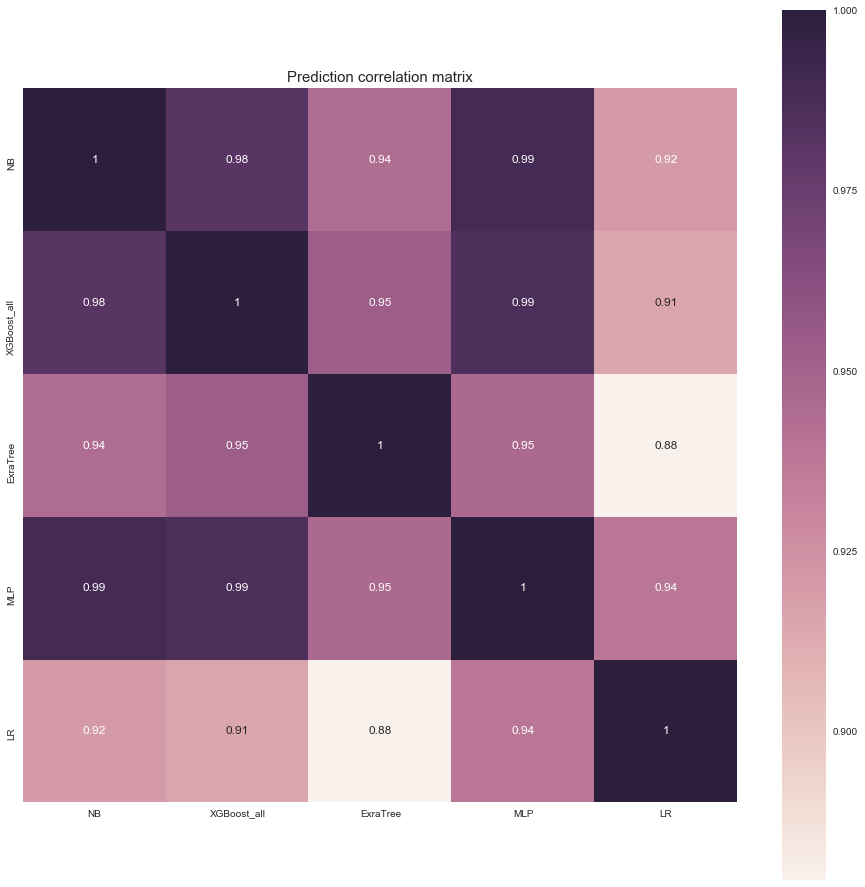

In [20]:
# Compute and display the correlation matrix of predictions
import seaborn as sns # visualization library based on matplotlib
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(X_test_layer3.corr(), square=True, annot=True)
plt.title("Prediction correlation matrix", fontsize=15)
plt.show()

In [ ]:
y_train_df.to_csv('./TEST_LAYER3_y.csv')

In [ ]:
# All 5
0.653702983787
0.515867766543
0.606613097232
0.456896627079